Dont forget to normalise the data (he guesses boosted trees will be the best)

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split


In [2]:
nutrition = pd.read_pickle("./nutrition_data_clean.pkl")
nutrition

,name,Food Group,Branded?,Price (£),Weight (GRAMS),Price per Weight (£/100Gram),Carbon Group,Land use (m2/100g),GHG(kgco2eq/100g),Water use (L/100g),Acidifying emissions(kgSO2eq/100g),Eutr emissions (kg PO43-eq per 100g),Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Cholesterol (mg),Saturated Fats (g)
0,Pillsbury Cinnamon Rolls With Icing Refrigerat...,Baked Foods,NaN,1.70,260.0,0.653846,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,330,11.27,4.34,53.42,21.34,1.4,0.0,3.250
1,Waffles Buttermilk Frozen Ready-To-Heat,Baked Foods,X,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,273,9.22,6.58,41.05,4.30,2.2,15.0,1.898
2,Waffle Buttermilk Frozen Ready-To-Heat Toasted,Baked Foods,X,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,309,9.49,7.42,48.39,4.41,2.6,13.0,2.275
3,Waffle Buttermilk Frozen Ready-To-Heat Microwaved,Baked Foods,X,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,289,9.40,6.92,44.16,4.50,2.4,16.0,2.057
4,Waffle Plain Frozen Ready-To-Heat Microwave,Baked Foods,X,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,298,9.91,6.71,45.41,5.04,2.4,16.0,1.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Plantain Fried,Vegetables,NaN,0.90,85.0,1.058824,Other vegetables,0.0310,0.0455,8.3,0.000531,0.000186,241,10.16,1.66,40.60,19.10,2.9,0.0,1.507
1219,Romaine Lettuce Raw,Vegetables,NaN,1.00,400.0,0.250000,Other vegetables,0.0310,0.0455,8.3,0.000531,0.000186,19,0.27,1.39,3.78,0.71,3.1,0.0,0.053
1220,Palak Paneer,Vegetables,NaN,3.75,500.0,0.750000,Cheese,8.0642,2.1240,473.5,0.014894,0.008875,96,6.84,5.23,4.32,1.89,1.2,7.0,1.486
1221,Carrots Raw Salad,Vegetables,NaN,0.41,1000.0,0.041000,Other vegetables,0.0310,0.0455,8.3,0.000531,0.000186,208,15.70,1.22,17.17,11.23,2.3,9.0,2.452


Initially i want to ignore any collumns on carbon and just try to get a price predictor.

In [3]:
#cutting collumns 6 to 11
nutrition.drop(nutrition.columns[6:12], axis=1, inplace=True)
nutrition

,name,Food Group,Branded?,Price (£),Weight (GRAMS),Price per Weight (£/100Gram),Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Cholesterol (mg),Saturated Fats (g)
0,Pillsbury Cinnamon Rolls With Icing Refrigerat...,Baked Foods,NaN,1.70,260.0,0.653846,330,11.27,4.34,53.42,21.34,1.4,0.0,3.250
1,Waffles Buttermilk Frozen Ready-To-Heat,Baked Foods,X,1.50,567.0,0.264550,273,9.22,6.58,41.05,4.30,2.2,15.0,1.898
2,Waffle Buttermilk Frozen Ready-To-Heat Toasted,Baked Foods,X,1.50,567.0,0.264550,309,9.49,7.42,48.39,4.41,2.6,13.0,2.275
3,Waffle Buttermilk Frozen Ready-To-Heat Microwaved,Baked Foods,X,1.50,567.0,0.264550,289,9.40,6.92,44.16,4.50,2.4,16.0,2.057
4,Waffle Plain Frozen Ready-To-Heat Microwave,Baked Foods,X,1.50,567.0,0.264550,298,9.91,6.71,45.41,5.04,2.4,16.0,1.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Plantain Fried,Vegetables,NaN,0.90,85.0,1.058824,241,10.16,1.66,40.60,19.10,2.9,0.0,1.507
1219,Romaine Lettuce Raw,Vegetables,NaN,1.00,400.0,0.250000,19,0.27,1.39,3.78,0.71,3.1,0.0,0.053
1220,Palak Paneer,Vegetables,NaN,3.75,500.0,0.750000,96,6.84,5.23,4.32,1.89,1.2,7.0,1.486
1221,Carrots Raw Salad,Vegetables,NaN,0.41,1000.0,0.041000,208,15.70,1.22,17.17,11.23,2.3,9.0,2.452


In [4]:
#Cutting branded collumn(probably better to keep this and turn into 1s and 0s maybe)
nutrition.drop(nutrition.columns[2], axis=1, inplace=True)

In [5]:
nutrition.dropna() #getting rid of na values.

,name,Food Group,Price (£),Weight (GRAMS),Price per Weight (£/100Gram),Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Cholesterol (mg),Saturated Fats (g)
0,Pillsbury Cinnamon Rolls With Icing Refrigerat...,Baked Foods,1.70,260.0,0.653846,330,11.27,4.34,53.42,21.34,1.4,0.0,3.250
1,Waffles Buttermilk Frozen Ready-To-Heat,Baked Foods,1.50,567.0,0.264550,273,9.22,6.58,41.05,4.30,2.2,15.0,1.898
2,Waffle Buttermilk Frozen Ready-To-Heat Toasted,Baked Foods,1.50,567.0,0.264550,309,9.49,7.42,48.39,4.41,2.6,13.0,2.275
3,Waffle Buttermilk Frozen Ready-To-Heat Microwaved,Baked Foods,1.50,567.0,0.264550,289,9.40,6.92,44.16,4.50,2.4,16.0,2.057
4,Waffle Plain Frozen Ready-To-Heat Microwave,Baked Foods,1.50,567.0,0.264550,298,9.91,6.71,45.41,5.04,2.4,16.0,1.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Plantain Fried,Vegetables,0.90,85.0,1.058824,241,10.16,1.66,40.60,19.10,2.9,0.0,1.507
1219,Romaine Lettuce Raw,Vegetables,1.00,400.0,0.250000,19,0.27,1.39,3.78,0.71,3.1,0.0,0.053
1220,Palak Paneer,Vegetables,3.75,500.0,0.750000,96,6.84,5.23,4.32,1.89,1.2,7.0,1.486
1221,Carrots Raw Salad,Vegetables,0.41,1000.0,0.041000,208,15.70,1.22,17.17,11.23,2.3,9.0,2.452


In [14]:
# Importing the dataset

X = nutrition.iloc[:, 5:]
y = nutrition.iloc[:, 4]


,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Cholesterol (mg),Saturated Fats (g)
0,330,11.27,4.34,53.42,21.34,1.4,0.0,3.250
1,273,9.22,6.58,41.05,4.30,2.2,15.0,1.898
2,309,9.49,7.42,48.39,4.41,2.6,13.0,2.275
3,289,9.40,6.92,44.16,4.50,2.4,16.0,2.057
4,298,9.91,6.71,45.41,5.04,2.4,16.0,1.580
...,...,...,...,...,...,...,...,...
1218,241,10.16,1.66,40.60,19.10,2.9,0.0,1.507
1219,19,0.27,1.39,3.78,0.71,3.1,0.0,0.053
1220,96,6.84,5.23,4.32,1.89,1.2,7.0,1.486
1221,208,15.70,1.22,17.17,11.23,2.3,9.0,2.452


In [7]:
# i want to use info from collums 5 to 12 to predict price per weight ie collumn 4
print('num classes:', len(np.unique(y)))

num_classes = len(np.unique(y)) #checking how many classes we have
num_features = X.shape[1]
print(X.shape) #shape of our array

num classes: 547
(1223, 8)


In [8]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 8))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer

model.add(Dense(units = 1))

#model.add(Dense(1))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 10, epochs = 100)



Epoch 1/100
98/98 [==============================] - 0s 732us/step - loss: nan
Epoch 2/100
98/98 [==============================] - 0s 646us/step - loss: nan
Epoch 3/100
98/98 [==============================] - 0s 618us/step - loss: nan
Epoch 4/100
98/98 [==============================] - 0s 595us/step - loss: nan
Epoch 5/100
98/98 [==============================] - 0s 596us/step - loss: nan
Epoch 6/100
98/98 [==============================] - 0s 593us/step - loss: nan
Epoch 7/100
98/98 [==============================] - 0s 610us/step - loss: nan
Epoch 8/100
98/98 [==============================] - 0s 597us/step - loss: nan
Epoch 9/100
98/98 [==============================] - 0s 619us/step - loss: nan
Epoch 10/100
98/98 [==============================] - 0s 609us/step - loss: nan
Epoch 11/100
98/98 [==============================] - 0s 601us/step - loss: nan
Epoch 12/100
98/98 [==============================] - 0s 624us/step - loss: nan
Epoch 13/100
98/98 [=============================

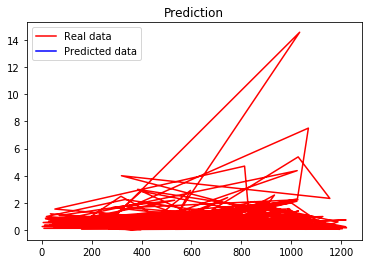

In [12]:
y_pred = model.predict(X_test)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

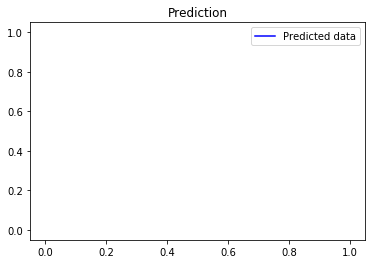

In [13]:
y_pred = model.predict(X_test)

#plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

cite: https://stackoverflow.com/questions/49008074/how-to-create-a-neural-network-for-regression